In [ ]:
# Import dependencies
import csv
import os
from classification_report_generator import generate_classification_report

# Match the data

In [2]:
def merge_tsv(tsv_file1, tsv_file2, output_file):
    """
    Function to merge the dataframes from both files based on the common columns.

    Param:
        tsv_file1 (str): Path to the first TSV file to be merged.
        tsv_file2 (str): Path to the second TSV file to be merged.
        output_file (str): Path to the output TSV file where the merged data will be saved.

    Returns:
        None
    """
    merged_rows = []

    with open(tsv_file1, 'r', encoding='utf-8') as file1, open(tsv_file2, 'r', encoding='utf-8') as file2:
        reader1 = csv.DictReader(file1, delimiter='\t')
        reader2 = csv.DictReader(file2, delimiter='\t')
        
        tsv1_rows = {row['synset']: row for row in reader1}

        for row2 in reader2:
            synset = row2['synset']
            if synset in tsv1_rows:
                row1 = tsv1_rows[synset]
                confidence = int(row1['count'])
                language = row1['language']
            else:
                confidence = 'None'
                language = 'None'

            merged_row = {
                'synset': synset,
                'lemma': row2['lemma'],
                'annotation': row2['annotation'],
                'goodness label': row2['goodness label'],
                'confidence': confidence,
                'language': language
            }
            merged_rows.append(merged_row)

    fieldnames = ['synset', 'lemma', 'annotation', 'goodness label', 'confidence', 'language']
    with open(output_file, 'w', encoding='utf-8', newline='') as outfile:
        writer = csv.DictWriter(outfile, fieldnames=fieldnames, delimiter='\t')
        writer.writeheader()
        writer.writerows(merged_rows)

tsv_file1 = './data/synset_output_wiktionary_with_labels.tsv'
tsv_file2 = './data/evaluation_set_with_labels.tsv'
output_file = './data/merged_file_wiktionary_eval.tsv'

merge_tsv(tsv_file1, tsv_file2, output_file)
print("TSV files merged and saved as:", output_file)

TSV files merged and saved as: ./data/merged_file_wiktionary_eval.tsv


# Run the best condition

In [3]:
def process_synsets(input_tsv_path, output_tsv_path, threshold):
    """
    Function to process a TSV file, assigning prediction labels based on given criteria.
    Param:
        input_tsv_path (str): Path to the input TSV file.
        output_tsv_path (str): Path to the output TSV file.
        threshold (str): Threshold value for prediction label assignment.
    Returns:
        None
    """
    with open(input_tsv_path, 'r', encoding='utf-8') as tsv_file:
        reader = csv.DictReader(tsv_file, delimiter='\t')
        rows = list(reader)

    with open(output_tsv_path, 'w', newline='', encoding='utf-8') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerow(['synset', 'lemma', 'annotation', 'prediction label'])

        for row in rows:
            synset = row['synset']
            lemma = row['lemma']
            annotation = row['annotation']
            goodness_label = row['goodness label']
            confidence_score = row['confidence']
            language = row['language']
            
            label = assign_label(synset, confidence_score, language, goodness_label, threshold)

            writer.writerow([synset, lemma, annotation, label])

    print(f"Prediction labels saved to '{output_tsv_path}' successfully.")
    
## Condition 5
def assign_label(synset, confidence_score, language, goodness_label, threshold):
    """
    Function to assign a label to a synset based on given criteria.

    Param:
        synset (str): The synset to be labeled.
        confidence_score (float): The confidence score associated with the synset.
        language (str): The language of the synset.
        goodness_label (str): The goodness label associated with the synset.
        threshold (str): The threshold value used for comparison with confidence_score.

    Returns:
        str: The label assigned to the synset based on the predefined condition.
    """
    if goodness_label == 'O' and synset.endswith('-v') and confidence_score == threshold and language == 'English': #0.5199
        return 'DELETE'
    elif goodness_label == 'X' and synset.endswith('-v') and confidence_score == threshold and language == 'English':
        return 'DELETE'
    else:
        return 'KEEP'

input_tsv_path = './data/merged_file_wiktionary_eval.tsv'
output_tsv_path = './predictions_results/wiktionary_condition_five_eval.tsv'
threshold = '1'
process_synsets(input_tsv_path, output_tsv_path, threshold)

Prediction labels saved to './predictions_results/wiktionary_condition_five_eval.tsv' successfully.


# Generating classification report for files stored in predictions_results folder

Generating classification report for file: wiktionary_condition_one.tsv
Confusion Matrix:
True Positive (TP): 373
True Negative (TN): 5070
False Positive (FP): 1061
False Negative (FN): 842
Precision: 0.2601115760111576
Recall: 0.3069958847736626
F1-score: 0.2816157040392601


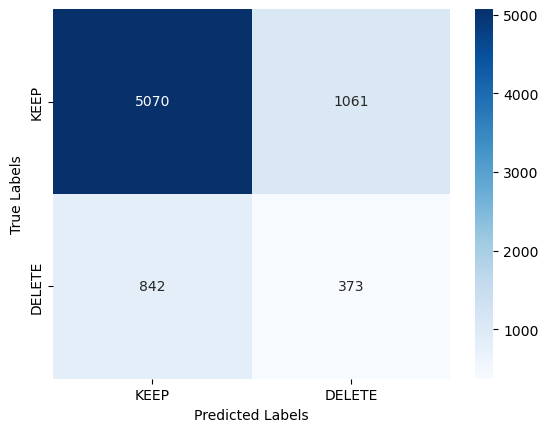


Generating classification report for file: wiktionary_condition_four.tsv
Confusion Matrix:
True Positive (TP): 1000
True Negative (TN): 2880
False Positive (FP): 3251
False Negative (FN): 215
Precision: 0.2352387673488591
Recall: 0.823045267489712
F1-score: 0.3658982802780827


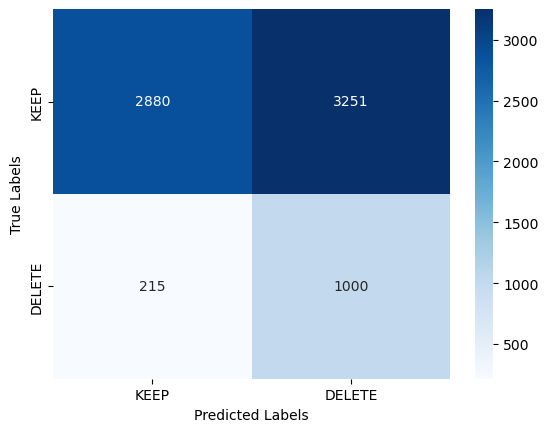


Generating classification report for file: wiktionary_condition_three.tsv
Confusion Matrix:
True Positive (TP): 419
True Negative (TN): 4873
False Positive (FP): 1258
False Negative (FN): 796
Precision: 0.24985092426952893
Recall: 0.3448559670781893
F1-score: 0.28976486860304285


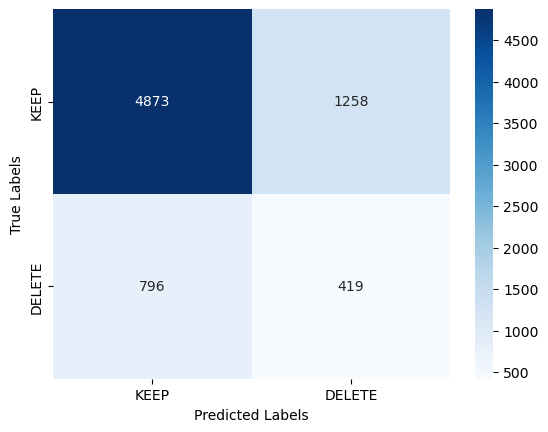


Generating classification report for file: wiktionary_condition_five.tsv
Confusion Matrix:
True Positive (TP): 257
True Negative (TN): 5881
False Positive (FP): 250
False Negative (FN): 958
Precision: 0.5069033530571992
Recall: 0.21152263374485597
F1-score: 0.29849012775842043


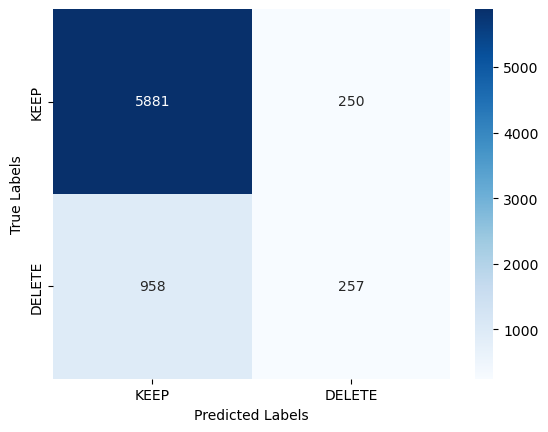


Generating classification report for file: wiktionary_condition_five_eval.tsv
Confusion Matrix:
True Positive (TP): 166
True Negative (TN): 3937
False Positive (FP): 160
False Negative (FN): 661
Precision: 0.50920245398773
Recall: 0.2007255139056832
F1-score: 0.28794449262792715


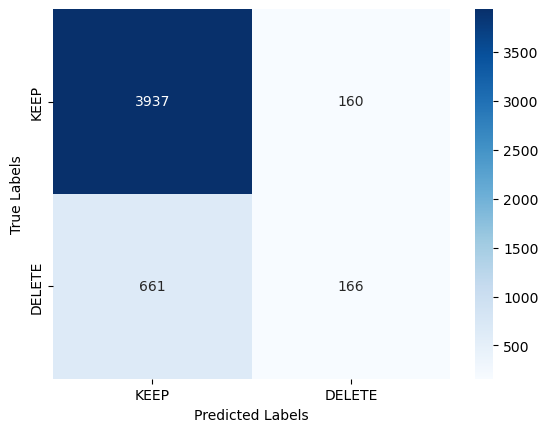


Generating classification report for file: wiktionary_condition_two.tsv
Confusion Matrix:
True Positive (TP): 954
True Negative (TN): 3077
False Positive (FP): 3054
False Negative (FN): 261
Precision: 0.23802395209580837
Recall: 0.7851851851851852
F1-score: 0.3653072946582424


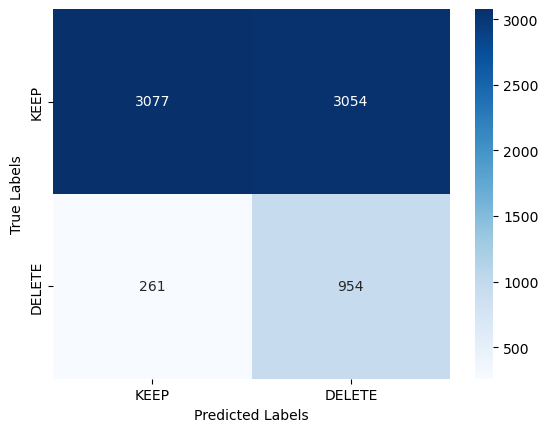

In [4]:
# Folder path where the prediction result files are located
folder_path = 'predictions_results'

for filename in os.listdir(folder_path):
    if filename.endswith('.tsv'):
        file_path = os.path.join(folder_path, filename)
        print(f"Generating classification report for file: {filename}")
        generate_classification_report(file_path)
        print() 